In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
pd.options.display.max_seq_items = 2000

In [2]:
#initialize dataframe
df = pd.DataFrame()

In [3]:
#read spreadsheet into dataframe
df = pd.read_excel('1645792390_cep1_dataset.xlsx')

Preliminary Analysis

In [4]:
#return the shape of the dataframe
df.shape

(303, 14)

In [5]:
#return variable with null values
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [6]:
#return variables with unique values
for col in df:
    print(col, df[col].unique())

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
cp [3 2 1 0]
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
reste

In [7]:
#return rows that contain duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [8]:
#remove duplicate rows
df.drop_duplicates(inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Report on Data

In [9]:
#Preliminary statistical summary of the data
#Explore measures of central tendencies and spread of the data
#Identify skewness of each variable
df.skew(axis = 0, skipna = False)

age        -0.203743
sex        -0.786120
cp          0.493022
trestbps    0.716541
chol        1.147332
fbs         1.981201
restecg     0.169467
thalach    -0.532671
exang       0.737281
oldpeak     1.266173
slope      -0.503247
ca          1.295738
thal       -0.481232
target     -0.173691
dtype: float64

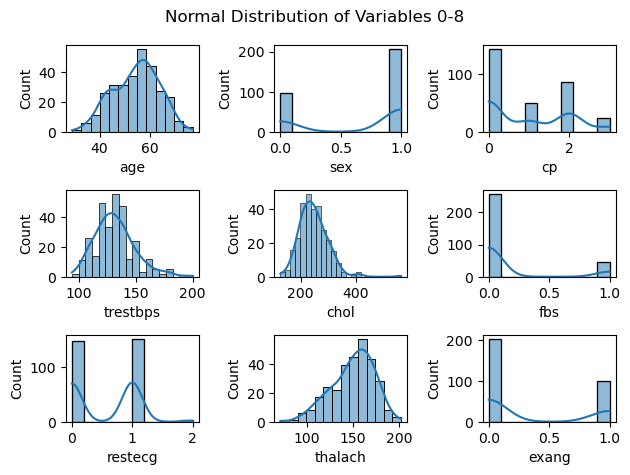

In [10]:
#Normal Distribution of the dataframe, variables 0-8
df_1 = df.iloc[:, :9]
fig, axes = plt.subplots(3,3)
fig.suptitle('Normal Distribution of Variables 0-8')

sns.histplot(ax=axes[0,0], data=df["age"], kde=True)
sns.histplot(ax=axes[0,1], data=df["sex"], kde=True)
sns.histplot(ax=axes[0,2], data=df["cp"], kde=True)
sns.histplot(ax=axes[1,0], data=df["trestbps"], kde=True)
sns.histplot(ax=axes[1,1], data=df["chol"], kde=True)
sns.histplot(ax=axes[1,2], data=df["fbs"], kde=True)
sns.histplot(ax=axes[2,0], data=df["restecg"], kde=True)
sns.histplot(ax=axes[2,1], data=df["thalach"], kde=True)
sns.histplot(ax=axes[2,2], data=df["exang"], kde=True)

plt.tight_layout()
plt.show()

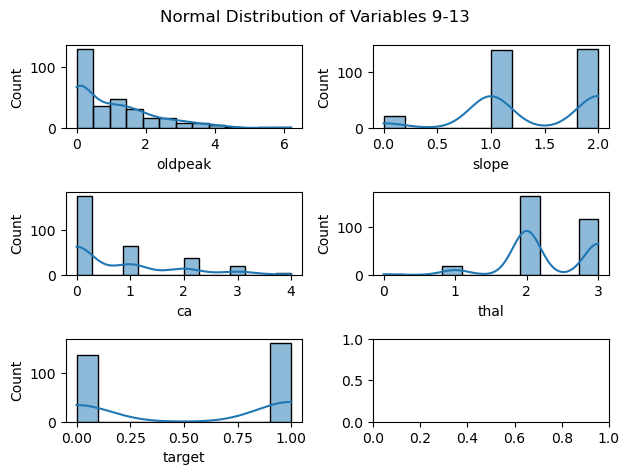

In [11]:
#Normal Distribution of the dataframe, variables 9-13
df_1 = df.iloc[:, 9:14]
fig, axes = plt.subplots(3,2)
fig.suptitle('Normal Distribution of Variables 9-13')

sns.histplot(ax=axes[0,0], data=df["oldpeak"], kde=True)
sns.histplot(ax=axes[0,1], data=df["slope"], kde=True)
sns.histplot(ax=axes[1,0], data=df["ca"], kde=True)
sns.histplot(ax=axes[1,1], data=df["thal"], kde=True)
sns.histplot(ax=axes[2,0], data=df["target"], kde=True)

plt.tight_layout()
plt.show()

<Axes: xlabel='sex'>

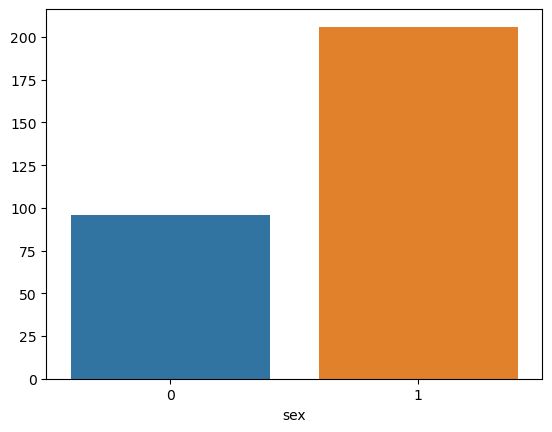

In [12]:
#Identify categorical variables
#Show sex variable distribution, 1 = male, 0 = female
sns.barplot(x=df['sex'].value_counts().index, y = df['sex'].value_counts().values)

<Axes: xlabel='cp'>

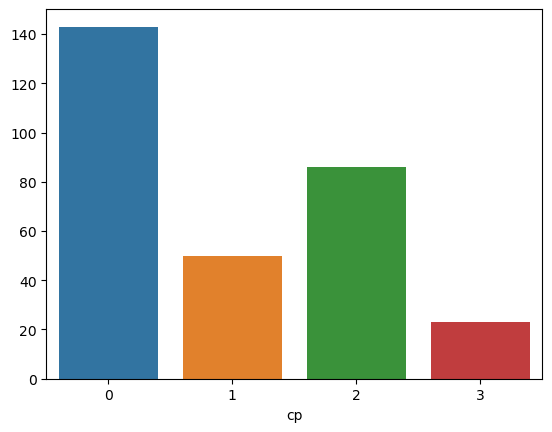

In [13]:
#Show cp variable distribution
sns.barplot(x=df['cp'].value_counts().index, y = df['cp'].value_counts().values)

<Axes: xlabel='fbs'>

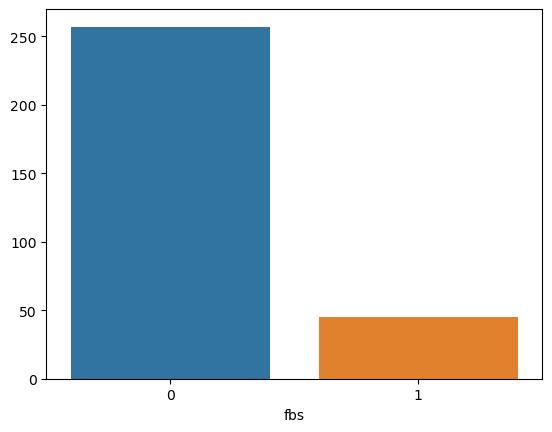

In [14]:
#Show fbs variable distribution
sns.barplot(x=df['fbs'].value_counts().index, y = df['fbs'].value_counts().values)

<Axes: xlabel='restecg'>

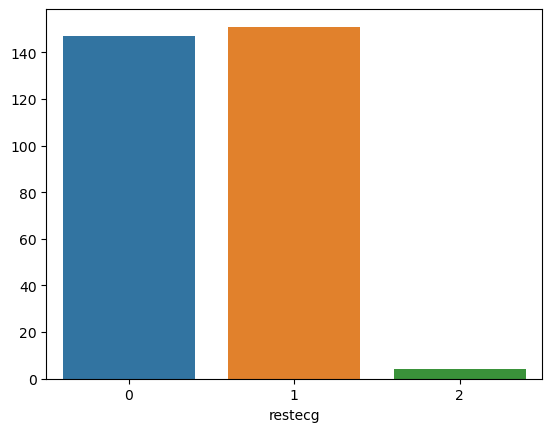

In [15]:
#Show restecg variable distribution
sns.barplot(x=df['restecg'].value_counts().index, y = df['restecg'].value_counts().values)

<Axes: xlabel='exang'>

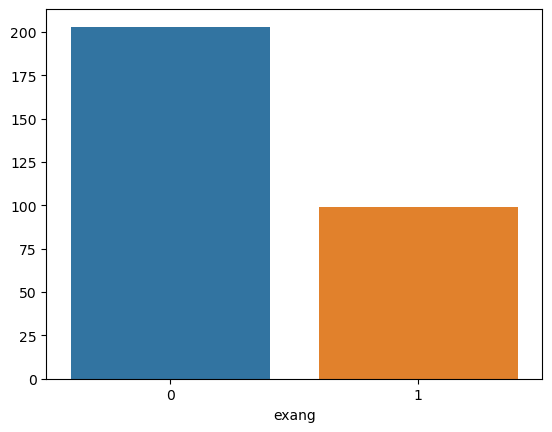

In [16]:
#Show exang variable distribution
sns.barplot(x=df['exang'].value_counts().index, y = df['exang'].value_counts().values)

<Axes: xlabel='slope'>

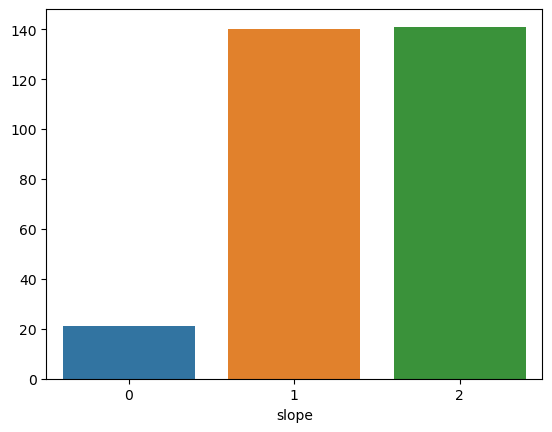

In [17]:
#Show slope variable distribution
sns.barplot(x=df['slope'].value_counts().index, y = df['slope'].value_counts().values)

<Axes: xlabel='thal'>

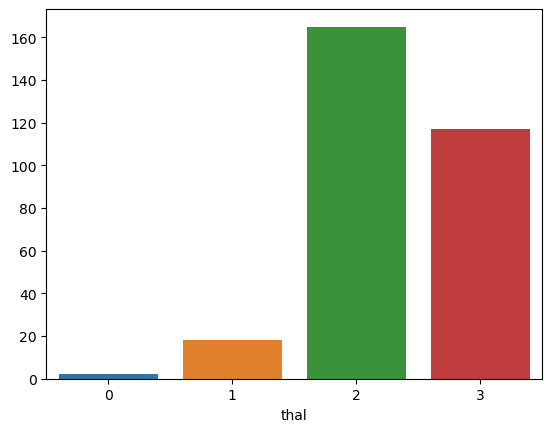

In [18]:
#Show thal variable distribution
sns.barplot(x=df['thal'].value_counts().index, y = df['thal'].value_counts().values)

<Axes: xlabel='target'>

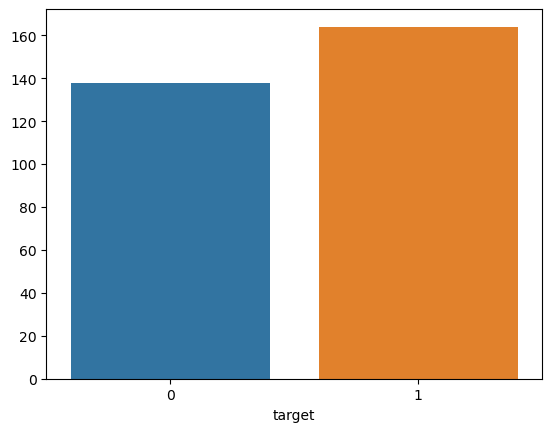

In [19]:
#Show target variable distribution
sns.barplot(x=df['target'].value_counts().index, y = df['target'].value_counts().values)

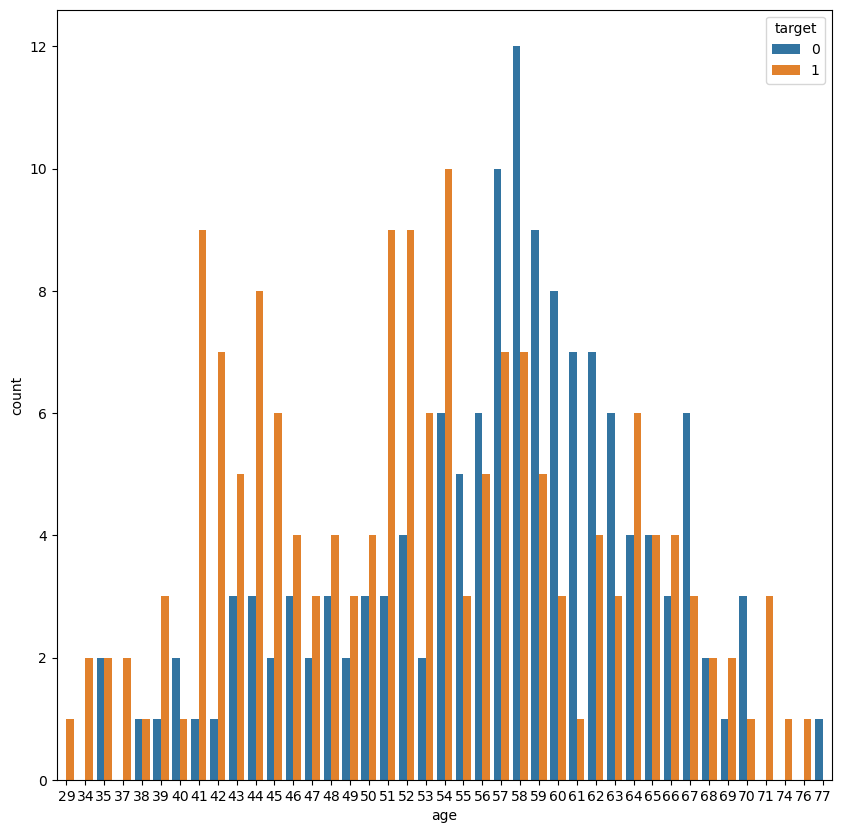

In [20]:
#Countplot to show CVD occurrence across the Age category
plt.figure(figsize=(10,10))
sns.countplot(data=df, x="age", hue="target")
plt.show()

<Axes: >

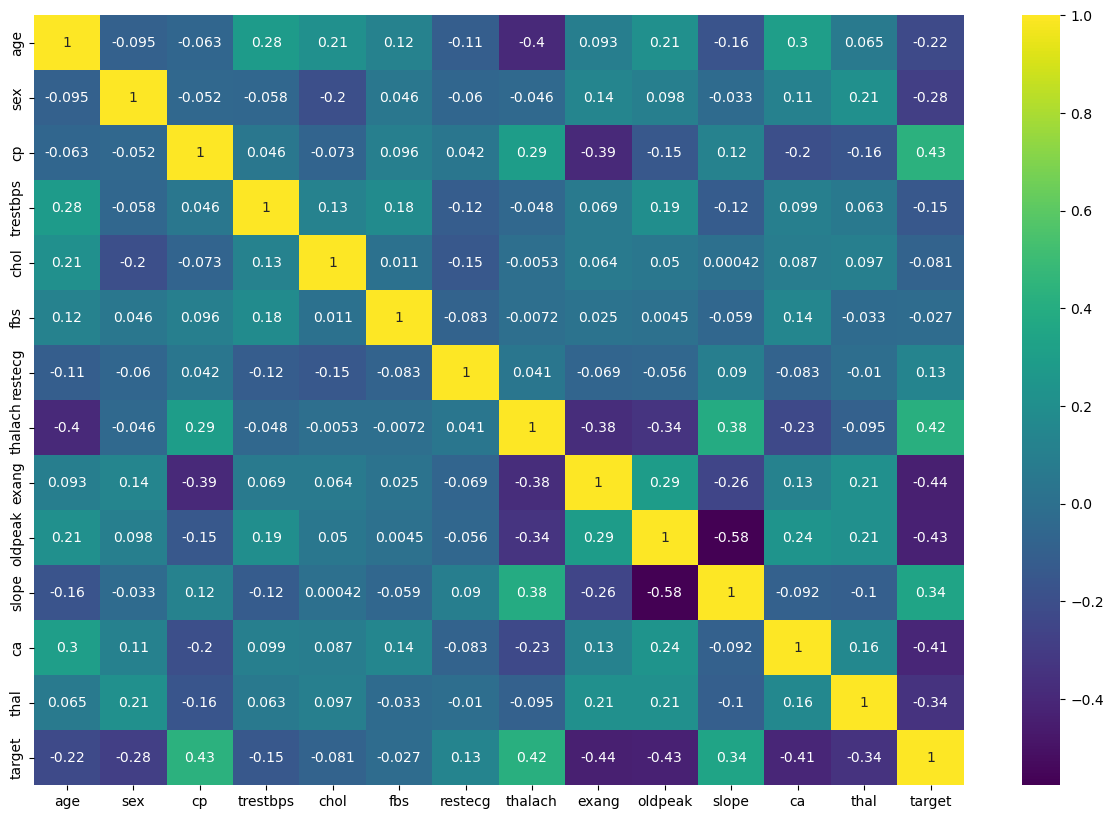

In [21]:
#Heatmap to see the composition of all patients with respect to the Sex category
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap = 'viridis')

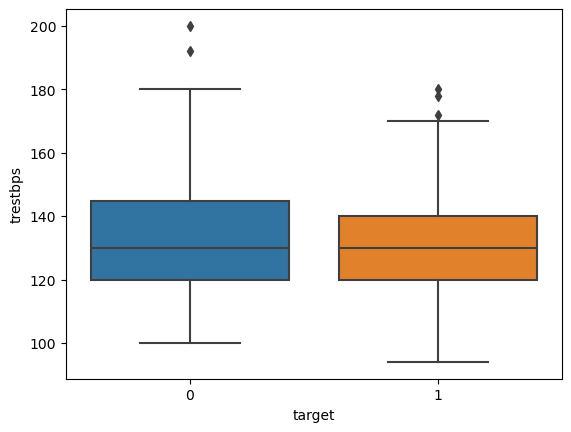

In [22]:
#Boxplot to show CVD occurrence across the resting blood pressure category
sns.boxplot(data=df, x="target", y="trestbps")
plt.show()

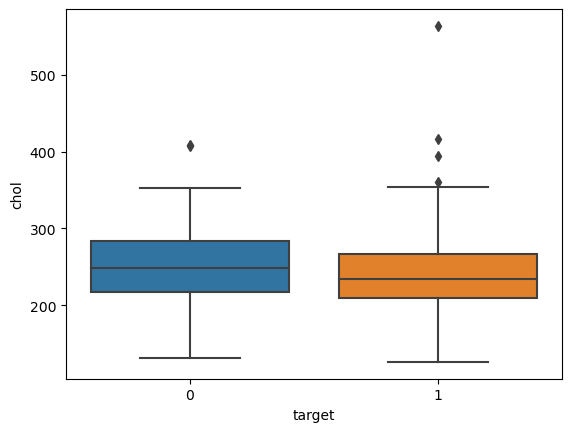

In [23]:
#Boxplot to show relationship between cholesterol levels and target variable
sns.boxplot(data=df, x="target", y="chol")
plt.show()

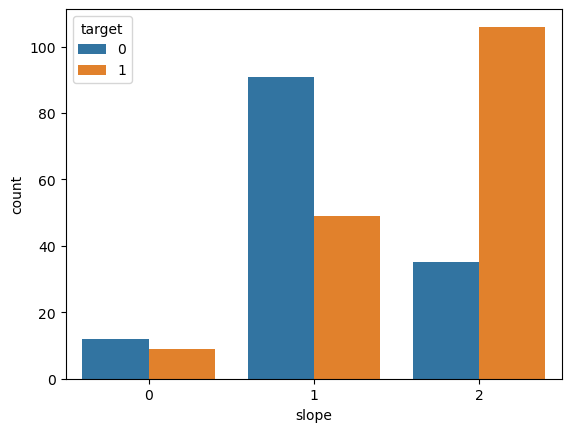

In [24]:
#Countplot to show relationship between peak exercising and CVD
sns.countplot(data=df, x="slope", hue="target")
plt.show()

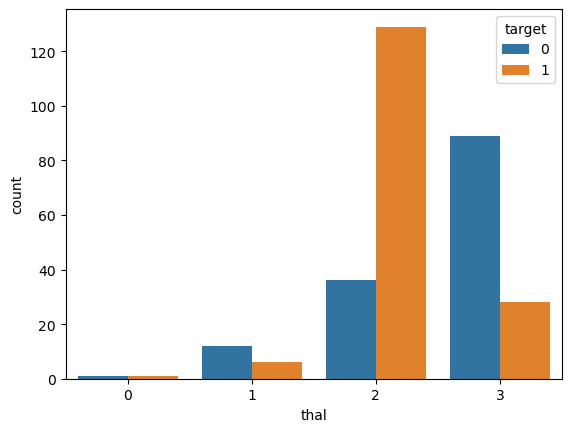

In [25]:
#Countplot to show relationship between thal and CVD
sns.countplot(data=df, x="thal", hue="target")
plt.show()

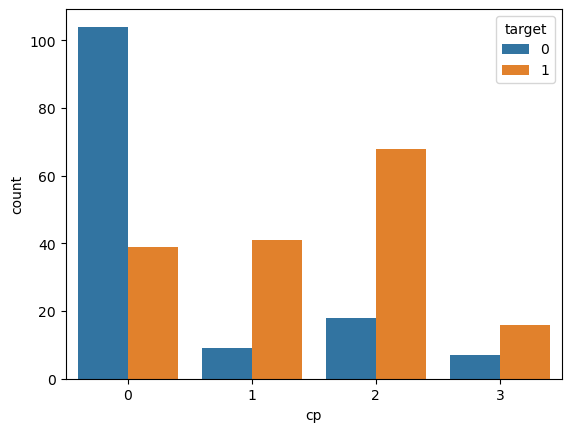

In [26]:
#Countplot to show relationship between cp and CVD
sns.countplot(data=df, x="cp", hue="target")
plt.show()

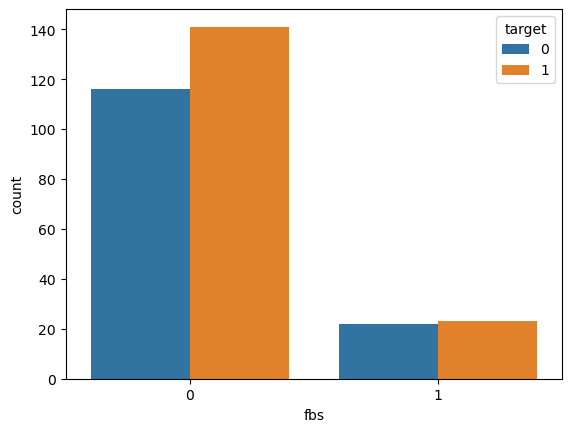

In [27]:
#Countplot to show relationship between fbs and CVD
sns.countplot(data=df, x="fbs", hue="target")
plt.show()

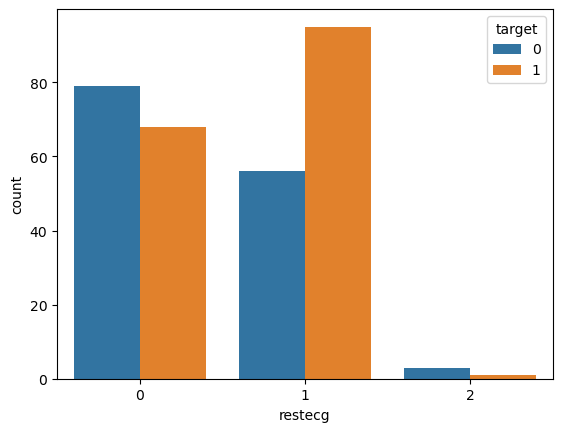

In [28]:
#Countplot to show relationship between restecg and CVD
sns.countplot(data=df, x="restecg", hue="target")
plt.show()

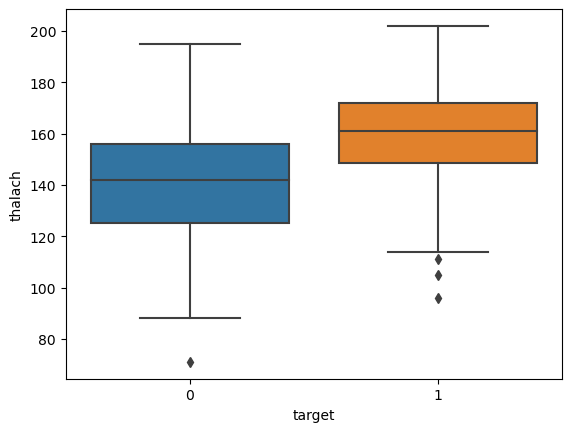

In [29]:
#Boxplot to show relationship between thalach and CVD
sns.boxplot(data=df, x="target", y="thalach")
plt.show()

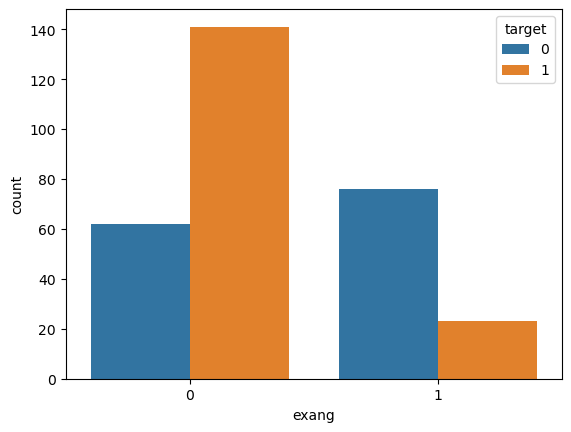

In [30]:
#Countplot to show relationship between exang and CVD
sns.countplot(data=df, x="exang", hue="target")
plt.show()

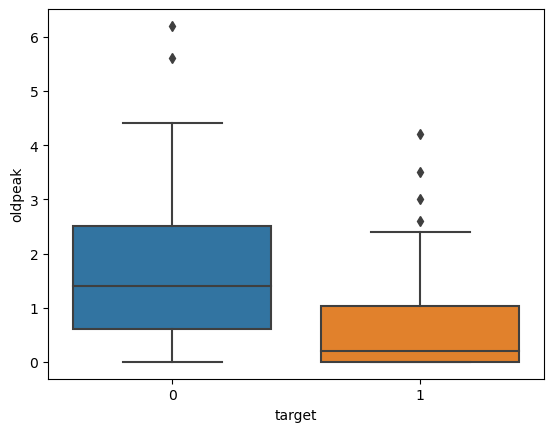

In [31]:
#Boxplot to show relationship between oldpeak and CVD
sns.boxplot(data=df, x="target", y="oldpeak")
plt.show()

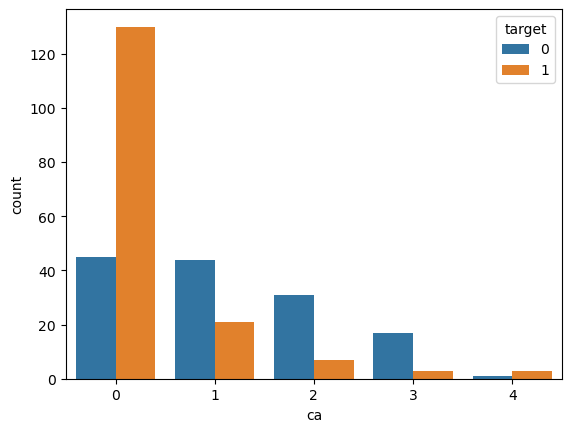

In [32]:
#Countplot to show relationship between ca and CVD
sns.countplot(data=df, x="ca", hue="target")
plt.show()

c:\Users\saini\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


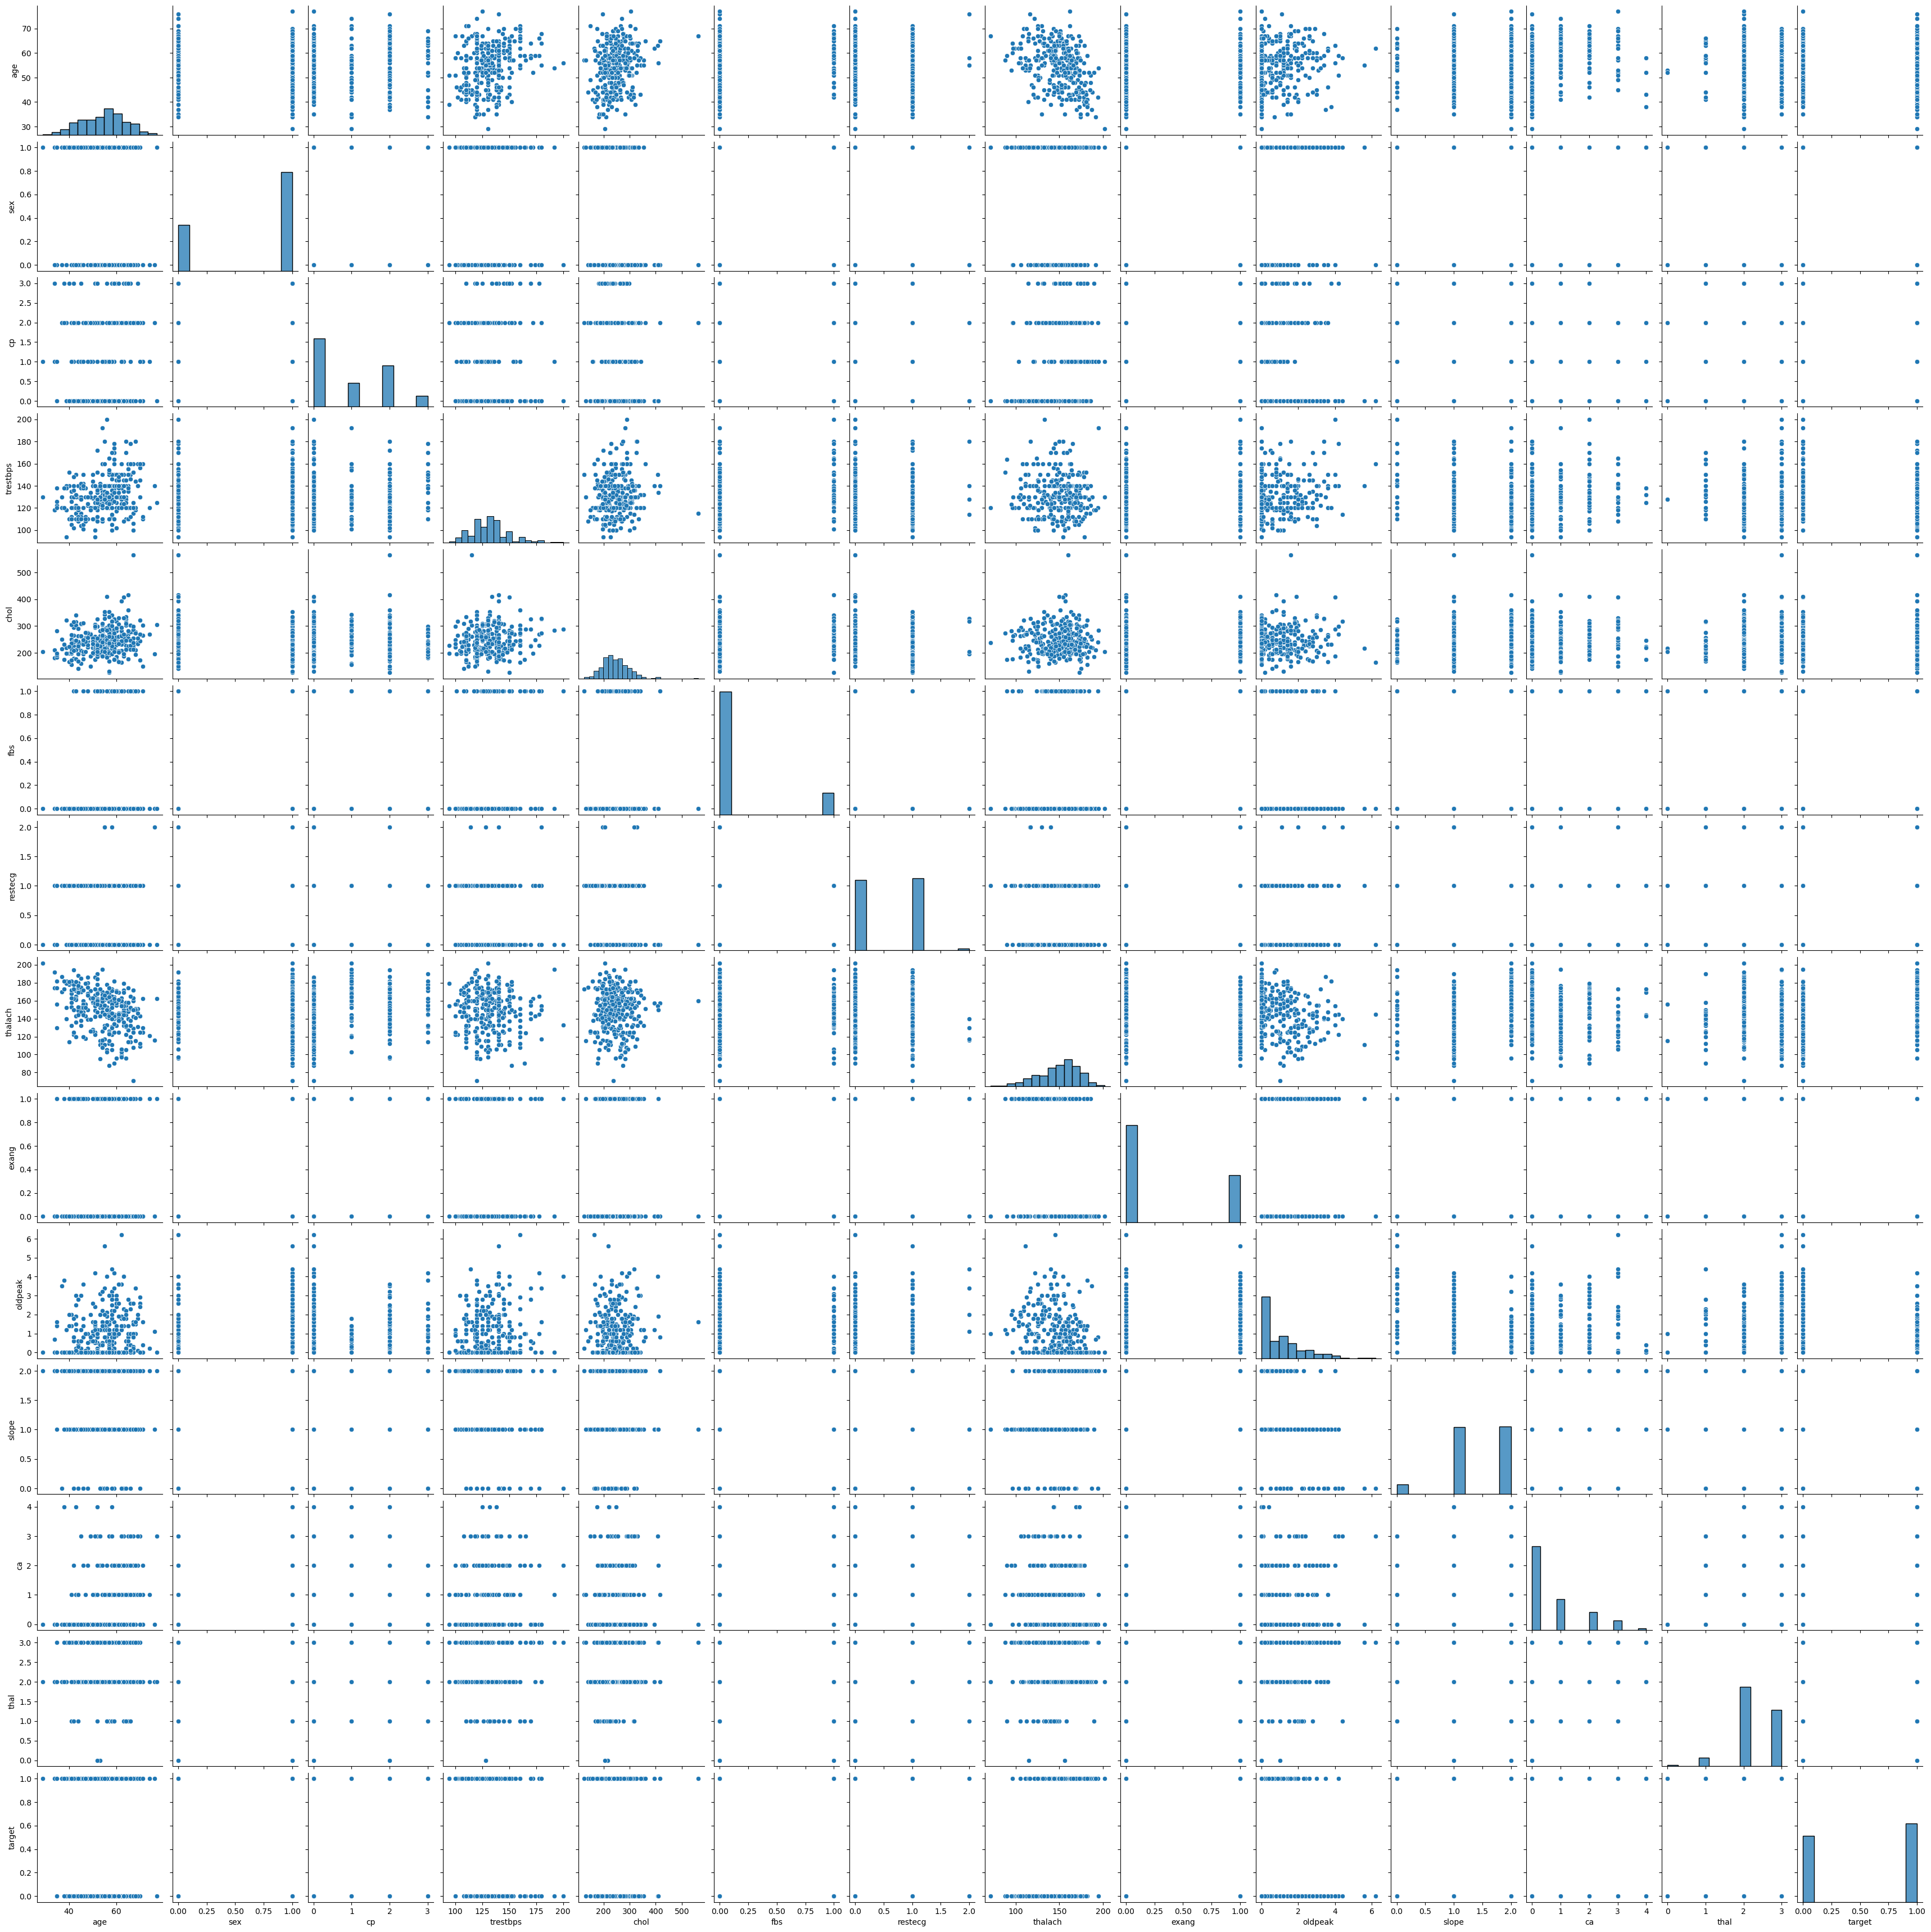

In [33]:
#Pairplot to understand the relationship between all given variables
sns.pairplot(df)

In [34]:
#Chi-square test to find significant categorical variables
#Return Chi and p values of each variable in comparison to the Target variable
#The higher the Chi value, the higher the importance of SaleCondition
#The opposite of Chi value is p value
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'target']
df_categorical = df[categorical_cols]
x = df_categorical.drop(columns=['target'], axis=1)
Y = df_categorical['target']
chiScores = chi2(x,Y)
chiScores

(array([ 7.72168971, 62.11608597,  0.1849456 ,  2.8777431 , 38.51884879,
         9.67771549,  5.75303001]),
 array([5.45613070e-03, 3.23795619e-15, 6.67157071e-01, 8.98118195e-02,
        5.42274293e-10, 1.86516398e-03, 1.64602424e-02]))

<Axes: >

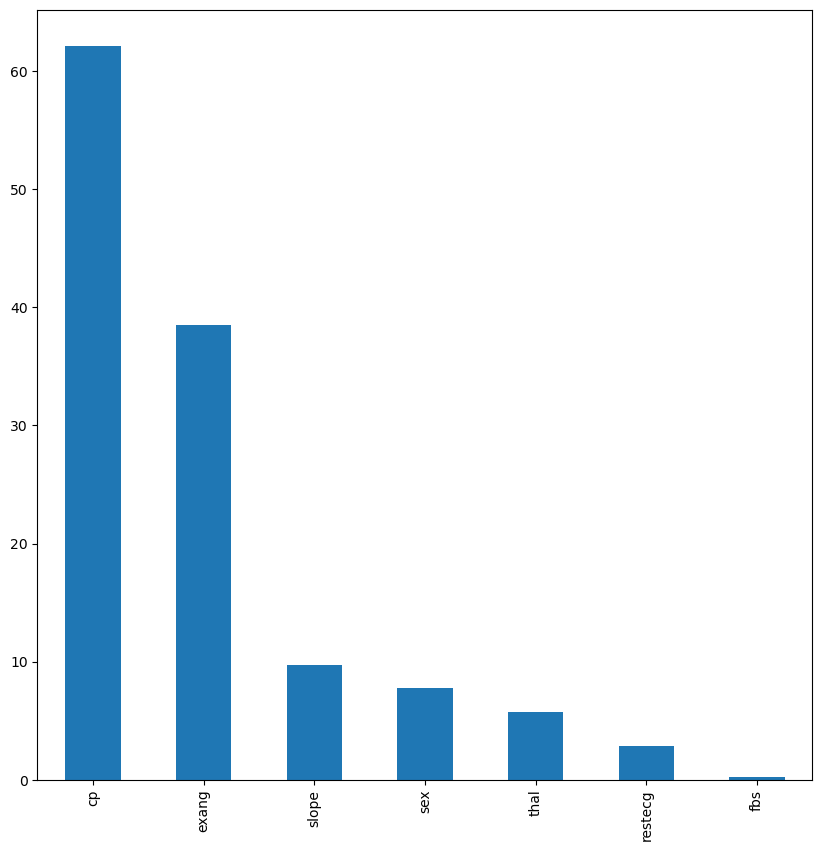

In [35]:
#Plot bar graph of the Chi values of each variable in relation to target
chiValues = pd.Series(chiScores[0], index=x.columns)
chiValues.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10,10))
chiValues.plot.bar()

<Axes: >

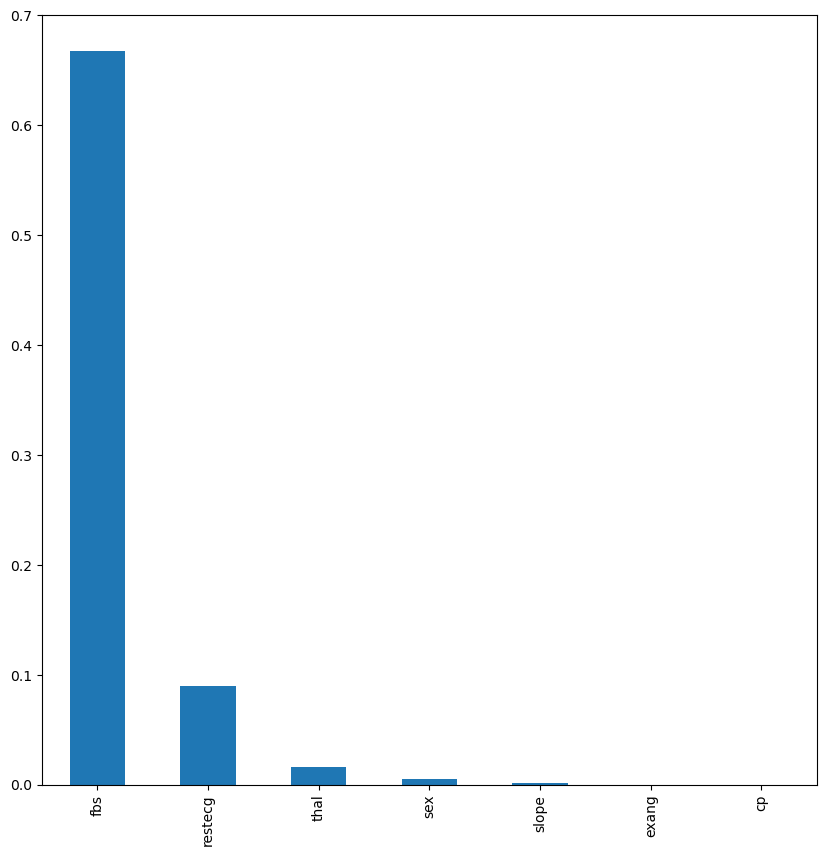

In [36]:
#Plot bar graph of the p values of each variable in relation to Target
pValues = pd.Series(chiScores[1], index=x.columns)
pValues.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(10,10))
pValues.plot.bar()

Build Prediction Model

In [37]:
#Split data into training and test dataframes
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, stratify=y, random_state=7)

In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\saini\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
pred = lr.predict(X_test)

In [40]:
#accuracy on test data
accuracy_score(y_test, pred)

0.8032786885245902

In [41]:
#accuracy on train data
accuracy_score(y_train, lr.predict(X_train))

0.8506224066390041

In [42]:
#change input data into numpy array
input_data = (63,1,0,145,233,1,0,150,0,2.3,0,0,3)
in_data_npArray = np.array(input_data)

#reshaping the numpy array for prediction
input_data_reshape = in_data_npArray.reshape(1,-1)
pred = lr.predict(input_data_reshape)
if(pred[0] == 0):
    print('This person does not have heart disease.')
else:
    print('This person has heart disease.')

This person does not have heart disease.


c:\Users\saini\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
